Code Sample from : https://github.com/ramkatt28/dsi-RameshKattumenu/blob/9de310d18a853b45f8af7e91ad0d4e9dd51e9cc7/week-03/instructor-contributions/NYC/4.3-feature-scaling/code/Feature-Scaling-Solutions.ipynb

https://machinelearningmastery.com/prepare-data-machine-learning-python-scikit-learn/





# Scikit-learn Min-Max Scaler Example



In [22]:
import pandas
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


# Scikit-Learn Standard Scaler Example

In [23]:
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit(data))

print(scaler.mean_)

print(scaler.transform(data))
print(scaler.transform([[2, 2]]))


StandardScaler(copy=True, with_mean=True, with_std=True)
[0.5 0.5]
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
[[3. 3.]]


#Real Example using Boston Dataset

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model, preprocessing

In [25]:
# Load the Boston Housing dataset
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Scaling the Data


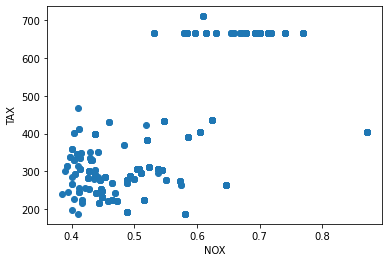

In [5]:
xs = df["NOX"]
ys = df["TAX"]

plt.scatter(xs, ys)
plt.xlabel("NOX")
plt.ylabel("TAX")
plt.show()


Standardization --->

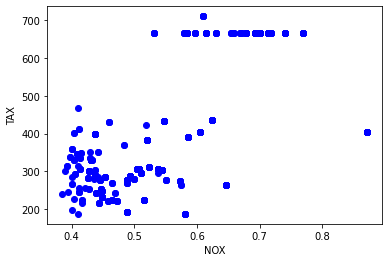

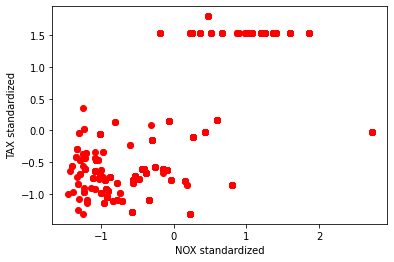

In [26]:
xs = df["NOX"]
ys = df["TAX"]
plt.scatter(xs, ys, color='b')
plt.xlabel("NOX")
plt.ylabel("TAX")
plt.show()

xs = df["NOX"]
mean = np.mean(xs)
std = np.std(xs)
xs = [(x - mean) / std for x in xs]

ys = df["TAX"]
mean = np.mean(ys)
std = np.std(ys)
ys = [(y - mean) / std for y in ys]

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX standardized")
plt.ylabel("TAX standardized")
plt.show()

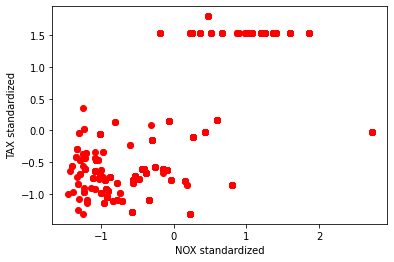

In [27]:


from sklearn import preprocessing

xs = preprocessing.scale(df["NOX"])
ys = preprocessing.scale(df["TAX"])

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX standardized")
plt.ylabel("TAX standardized")
plt.show()



Min-Max Scaler --->

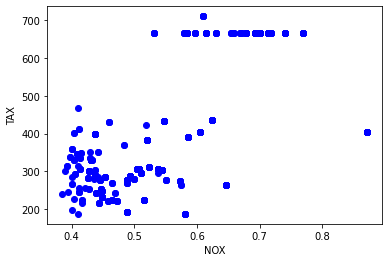

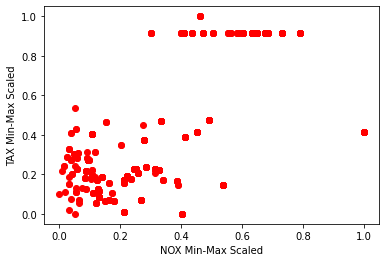

In [28]:
xs = df["NOX"]
ys = df["TAX"]
plt.scatter(xs, ys, color='b')
plt.xlabel("NOX")
plt.ylabel("TAX")
plt.show()

xs = df["NOX"]
xmin = np.min(xs)
xmax = np.max(xs)
xs = [(x - xmin) / (xmax - xmin) for x in xs]

ys = df["TAX"]
ymin = np.min(ys)
ymax = np.max(ys)
ys = [(y - ymin) / (ymax - ymin) for y in ys]

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX Min-Max Scaled")
plt.ylabel("TAX Min-Max Scaled")
plt.show()

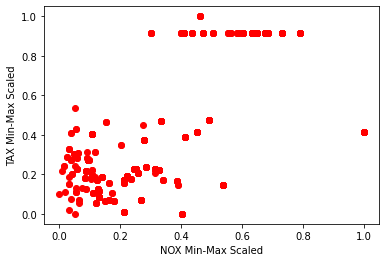

In [29]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

xs = scaler.fit_transform(df[["NOX"]])
ys = scaler.fit_transform(df[["TAX"]])

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX Min-Max Scaled")
plt.ylabel("TAX Min-Max Scaled")
plt.show()

Linear regression

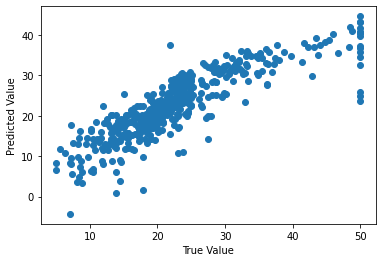

r^2: 0.7406426641094095


In [31]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

scaler = preprocessing.StandardScaler()
#X = df
X = scaler.fit_transform(df)
y = boston.target

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(y, predictions)
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

plt.show()
print ("r^2:", model.score(X, y))

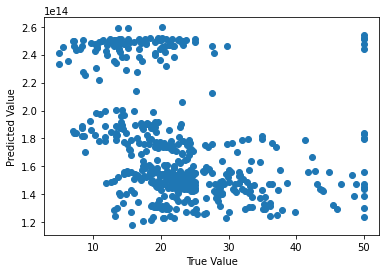

Model score: -3.8014413043931316e+26


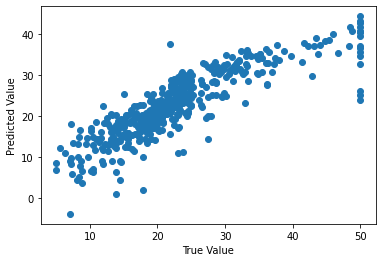

Model score: 0.7402731153789208


In [32]:
# Stochastic Regressor -- scaling makes a huge difference

X = df
y = boston.target

lm = linear_model.SGDRegressor()
model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(y, predictions)
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

plt.show()
print ("Model score:", model.score(X, y))

# Scaled

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(df)
y = boston.target

lm = linear_model.SGDRegressor()
model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(y, predictions)
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

plt.show()
print ("Model score:", model.score(X, y))


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# calculate MAE, MSE, RMSE
print("MAE", mean_absolute_error(y, predictions))
print("MSE",mean_squared_error(y, predictions))
print("RMSE",np.sqrt(mean_squared_error(y, predictions)))

MAE 3.2714353181951163
MSE 21.926028321535117
RMSE 4.682523712864156
